In [1]:
from zkrp import *
from scipy import optimize

In [ ]:
mean_midpoint = []
median_midpoint = []
FMoFM_midpoint = []
FMoFM_midpoint_l = []
FMoFM_midpoint_u = []
niter = 20
n = 20

label_list = ['frechet mean', 'frechet median', 'FMoFM']
color_list = ['red', 'blue', 'orange']

for i in range(niter):
    np.random.seed(0)
    FMoFM_list = []
    central = np.append(np.random.normal(0, 1, i+1), np.random.normal(4, 1, n-i-1))
    # central = np.random.normal(0, 1, n)

    mydata = np.zeros((n, 2))
    for j in range(n):
        interval_len = abs(np.random.normal(0, 1, 1))
        mydata[j, 0] = central[j] - interval_len / 2
        mydata[j, 1] = central[j] + interval_len / 2

    result = frechet_mean(mydata, method='hausdorff')
    result2 = frechet_mean(mydata, method='hausdorff1')
    for k in range(100):
        FMoFM_list.append(FMoFM(mydata, seed=k)['midpoint'])

    mean_midpoint.append(result['midpoint'])
    median_midpoint.append(result2['midpoint'])
    FMoFM_midpoint.append(np.mean(FMoFM_list))
    FMoFM_midpoint_l.append(np.percentile(FMoFM_list,2.5))
    FMoFM_midpoint_u.append(np.percentile(FMoFM_list,97.5))

x = np.array(range(niter)) +1
plt.figure(dpi=150, figsize=(8, 6))
plt.plot(x, mean_midpoint, alpha=1, color='red', label='frechet mean')
plt.plot(x, median_midpoint, alpha=1, color='blue', label='frechet median')
plt.plot(x, FMoFM_midpoint, alpha=1, color='orange', label='FMoFM')
plt.fill_between(x, FMoFM_midpoint_l, FMoFM_midpoint_u, alpha=0.25, linewidth=0, color='orange')

plt.title('plot of midpoint with diff outlier rate')  # 折线图标题

plt.xlabel('Rate')  # x轴标题
plt.ylabel('Midpoint')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
n_list= [30,50,70,100,150, 200,300, 500, 1000]
niter = 1000
Meanl = []
Medianl = []
FMoFMl = []
np.random.seed(0)
for iter in tqdm(range(niter)):
    mean_se = []
    median_se = []
    FMoFM_se = []

    for i in range(len(n_list)):
        FMoFM_list = []
        n = n_list[i]
        central = np.random.standard_t(3, n)

        mydata = np.zeros((n, 2))
        for j in range(n):
            interval_len = abs(np.random.normal(0, 1, 1))
            mydata[j, 0] = central[j] - interval_len / 2
            mydata[j, 1] = central[j] + interval_len / 2

        result = frechet_mean(mydata, method='hausdorff')
        result2 = frechet_mean(mydata, method='hausdorff1')
        for k in range(100):
            FMoFM_list.append(FMoFM(mydata,seed=k)['midpoint'])

        mean_se.append(pow(result['midpoint'], 2))
        median_se.append(pow(result2['midpoint'], 2))
        FMoFM_se.append(pow(np.mean(FMoFM_list), 2))
    Meanl.append(mean_se)
    Medianl.append(median_se)
    FMoFMl.append(FMoFM_se)

x = n_list
plt.figure(dpi=150, figsize=(8, 6))
plt.plot(x, np.mean(np.array(Meanl), 0), alpha=1, color='red', label='frechet mean')
plt.plot(x, np.mean(np.array(Medianl), 0), alpha=1, color='blue', label='frechet median')
plt.plot(x, np.mean(np.array(FMoFMl), 0), alpha=1, color='orange', label='FMoFM')

plt.title('plot of squared error with diff sample size')  # 折线图标题

plt.xlabel('sample size')  # x轴标题
plt.ylabel('squared error')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

  6%|▋         | 63/1000 [05:10<1:17:04,  4.94s/it]


KeyboardInterrupt: 

### choice of K

100%|██████████| 500/500 [01:00<00:00,  8.31it/s]


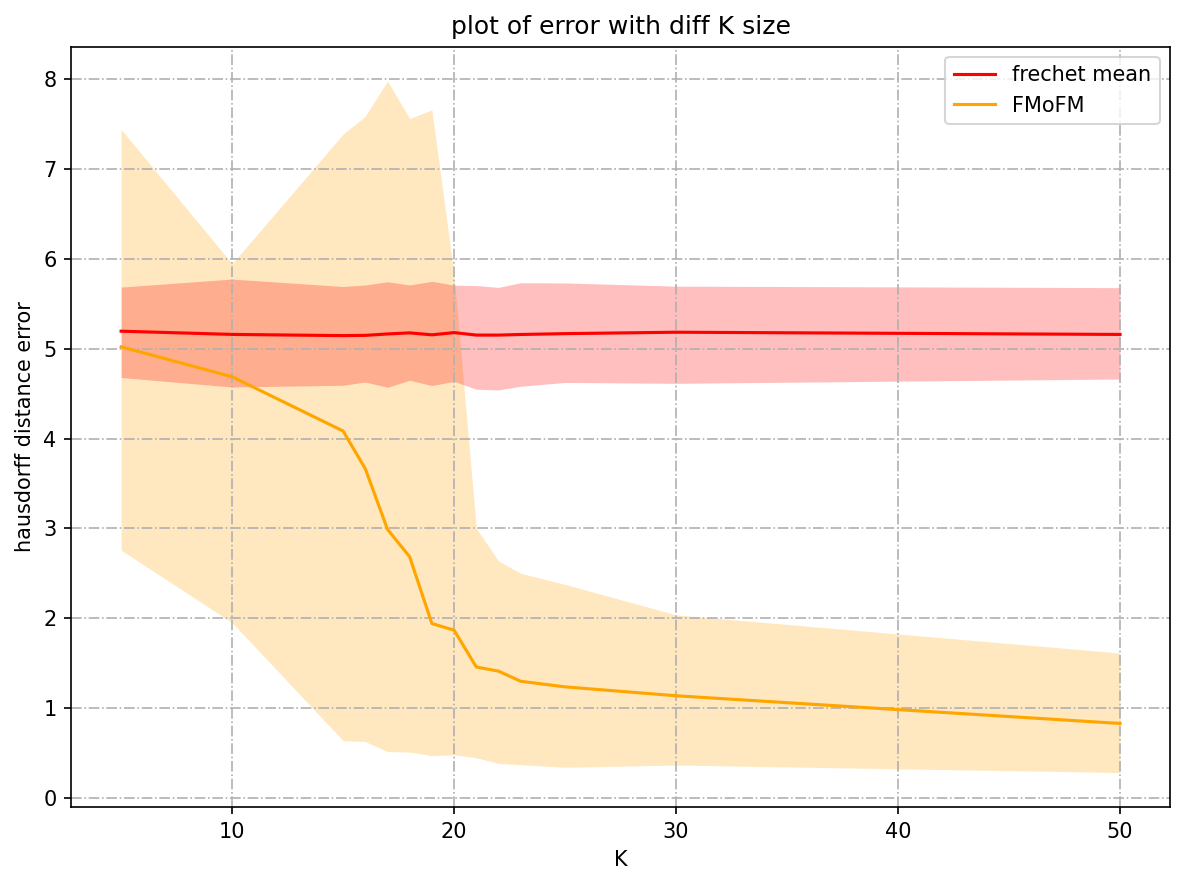

In [16]:
n_outlier = 10
k_list = [5,10,15,16,17,18,19,20,21,22,23,25,30,50]
n = 200
n_inlier = 190
niter = 500

FMoFMl = []
Meanl = []
np.random.seed(0)
for iter in tqdm(range(niter)):
    FMoFM_se = []
    mean_se = []

    for i in range(len(k_list)):
        k = k_list[i]
        central = np.random.normal(0, 4, n_inlier)
        central_o = np.random.normal(100, 4, n_outlier)

        mydata = np.zeros((n, 2))
        for j in range(n_inlier):
            interval_len = np.random.uniform(0, 1, 1)
            mydata[j, 0] = central[j] - interval_len / 2
            mydata[j, 1] = central[j] + interval_len / 2
        for s in range(n_outlier):
            interval_len_o = np.random.uniform(0, 2, 1)
            mydata[s+n_inlier, 0] = central_o[s] - interval_len_o / 2
            mydata[s+n_inlier, 1] = central_o[s] + interval_len_o / 2

        mean_se.append(frechet_mean(mydata, method='hausdorff')['interval'])
        FMoFM_se.append(FMoFM(mydata,fold=k)['interval'])
    Meanl.append([hausdorff_distance([-1/2, 1/2], i) for i in mean_se])
    FMoFMl.append([hausdorff_distance([-1/2, 1/2], i) for i in FMoFM_se])

x = k_list
plt.figure(dpi=150, figsize=(8, 6))
plt.plot(x, np.mean(np.array(Meanl), 0), alpha=1, color='red', label='frechet mean')
plt.plot(x, np.mean(np.array(FMoFMl), 0), alpha=1, color='orange', label='FMoFM')
# plt.plot(x, np.percentile(np.array(FMoFMl), 97.5, 0)-np.percentile(np.array(FMoFMl), 2.5, 0), alpha=0.5, color='blue', label='95% range length')
plt.fill_between(x, np.percentile(np.array(FMoFMl), 2.5, 0), np.percentile(np.array(FMoFMl), 97.5, 0), alpha=0.25, linewidth=0, color='orange')

plt.fill_between(x, np.percentile(np.array(Meanl), 2.5, 0), np.percentile(np.array(Meanl), 97.5, 0), alpha=0.25, linewidth=0, color='red')

plt.title('plot of error with diff K size')  # 折线图标题

plt.xlabel('K')  # x轴标题
plt.ylabel('hausdorff distance error')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### convergence

100%|██████████| 200/200 [00:20<00:00,  9.78it/s]


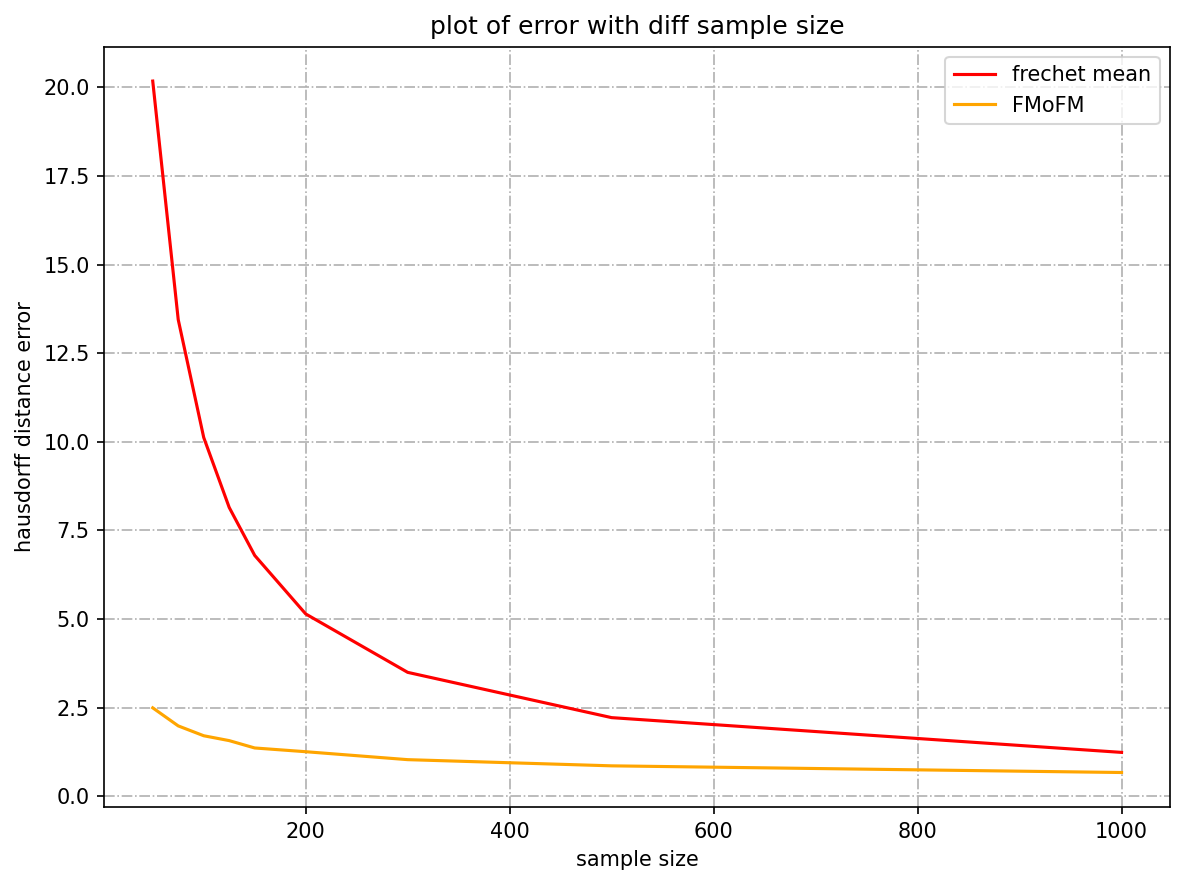

In [9]:
n_list= [50,75,100,125,150, 200,300, 500, 1000]
niter = 200
n_outlier = 10
k = 25
Meanl = []
Medianl = []
FMoFMl = []
np.random.seed(0)
for iter in tqdm(range(niter)):
    mean_se = []
    FMoFM_se = []

    for i in range(len(n_list)):
        n = n_list[i]
        n_inlier = n-n_outlier
        central = np.random.normal(0, 4, n_inlier)
        central_o = np.random.normal(100, 4, n_outlier)

        mydata = np.zeros((n, 2))
        for j in range(n_inlier):
            interval_len = np.random.uniform(0, 1, 1)
            mydata[j, 0] = central[j] - interval_len / 2
            mydata[j, 1] = central[j] + interval_len / 2
        for s in range(n_outlier):
            interval_len_o = np.random.uniform(0, 2, 1)
            mydata[s+n_inlier, 0] = central_o[s] - interval_len_o / 2
            mydata[s+n_inlier, 1] = central_o[s] + interval_len_o / 2

        mean_se.append(frechet_mean(mydata, method='hausdorff')['interval'])
        FMoFM_se.append(FMoFM(mydata,fold=k)['interval'])
    Meanl.append([hausdorff_distance([-1/2, 1/2], i) for i in mean_se])
    FMoFMl.append([hausdorff_distance([-1/2, 1/2], i) for i in FMoFM_se])

x = n_list
plt.figure(dpi=150, figsize=(8, 6))
plt.plot(x, np.mean(np.array(Meanl), 0), alpha=1, color='red', label='frechet mean')
plt.plot(x, np.mean(np.array(FMoFMl), 0), alpha=1, color='orange', label='FMoFM')

plt.title('plot of error with diff sample size')  # 折线图标题

plt.xlabel('sample size')  # x轴标题
plt.ylabel('hausdorff distance error')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### simulation with four kind of outliers

100%|██████████| 100/100 [00:09<00:00, 10.01it/s]


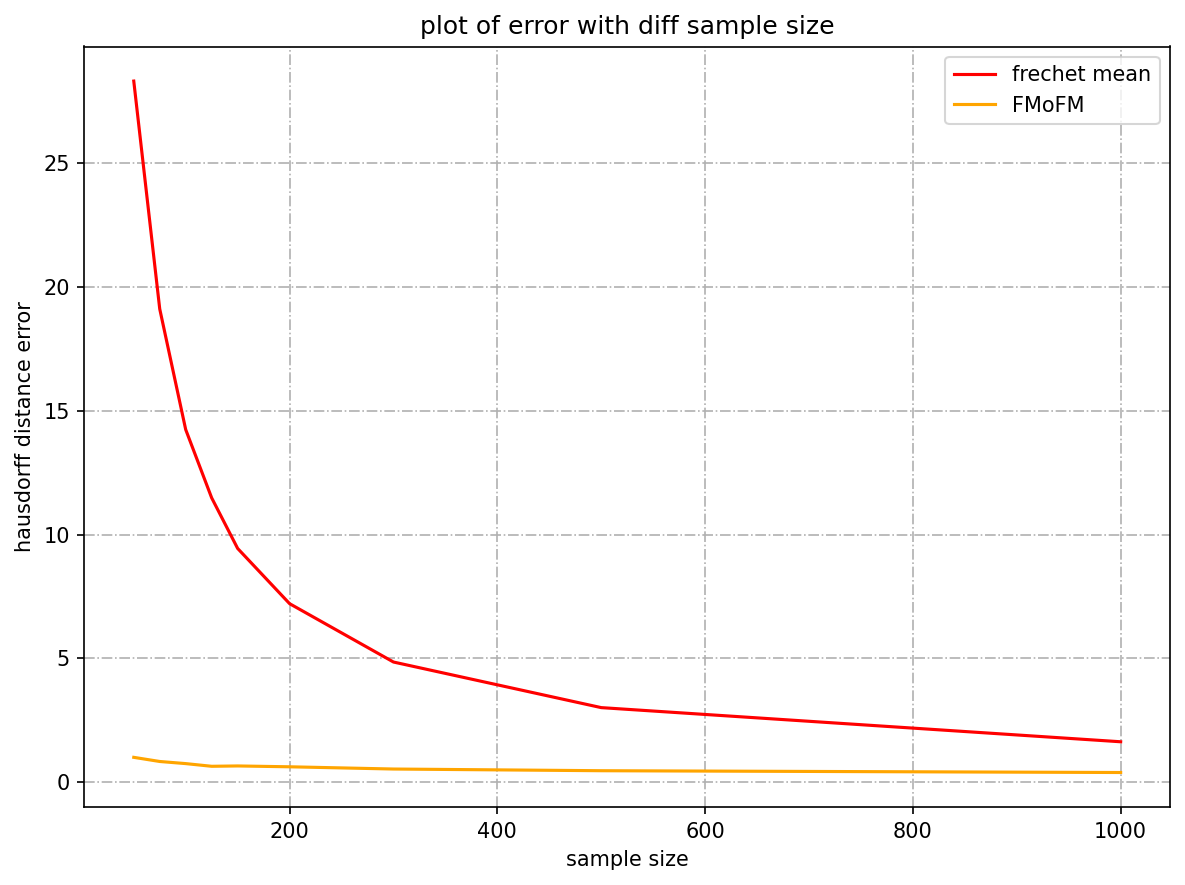

In [4]:
n_list= [50,75,100,125,150, 200,300, 500, 1000]
niter = 100
n_outlier = 12
n_outlier_i = 3

k = 25
Meanl = []
Medianl = []
FMoFMl = []
np.random.seed(0)
for iter in tqdm(range(niter)):
    mean_se = []
    FMoFM_se = []

    for i in range(len(n_list)):
        n = n_list[i]
        n_inlier = n-n_outlier
        central = np.random.normal(10, 4, n_inlier)
        central_o1 = np.random.normal(-500, 4, n_outlier_i)
        central_o2 = np.random.normal(1000, 4, n_outlier_i)
        central_o3 = np.random.binomial(1, 0.5, n_outlier_i)
        central_o4 = np.random.normal(10, 4, n_outlier_i) + np.random.standard_t(1,n_outlier_i)

        mydata = np.zeros((n, 2))
        for j in range(n_inlier):
            interval_len = np.random.uniform(0, 1, 1)
            mydata[j, 0] = central[j] - interval_len / 2
            mydata[j, 1] = central[j] + interval_len / 2


        # for s in range(n_outlier):
        #     interval_len_o = np.random.uniform(0, 2, 1)
        #     mydata[s+n_inlier, 0] = central_o4[s] - interval_len_o / 2
        #     mydata[s+n_inlier, 1] = central_o4[s] + interval_len_o / 2
        for s in range(n_outlier_i):
            interval_len_o = np.random.uniform(0, 2, 1)
            mydata[s+n_inlier, 0] = central_o1[s] - interval_len_o / 2
            mydata[s+n_inlier, 1] = central_o1[s] + interval_len_o / 2
        for t in range(n_outlier_i):
            interval_len_o = np.random.uniform(0, 2, 1)
            mydata[t+n_outlier_i+n_inlier, 0] = central_o2[t] - interval_len_o / 2
            mydata[t+n_outlier_i+n_inlier, 1] = central_o2[t] + interval_len_o / 2
        for r in range(n_outlier_i):
            interval_len_o = np.random.uniform(0, 2, 1)
            mydata[r+n_outlier_i*2+n_inlier, 0] = central_o3[r] - interval_len_o / 2
            mydata[r+n_outlier_i*2+n_inlier, 1] = central_o3[r] + interval_len_o / 2
        for p in range(n_outlier_i):
            interval_len_o = np.random.uniform(0, 2, 1)
            mydata[p+n_outlier_i*3+n_inlier, 0] = central_o4[p] - interval_len_o / 2
            mydata[p+n_outlier_i*3+n_inlier, 1] = central_o4[p] + interval_len_o / 2

        mean_se.append(frechet_mean(mydata, method='hausdorff')['interval'])
        FMoFM_se.append(FMoFM(mydata,fold=k)['interval'])
    Meanl.append([hausdorff_distance([10-1/2, 10+1/2], i) for i in mean_se])
    FMoFMl.append([hausdorff_distance([10-1/2, 10+1/2], i) for i in FMoFM_se])

x = n_list
plt.figure(dpi=150, figsize=(8, 6))
plt.plot(x, np.mean(np.array(Meanl), 0), alpha=1, color='red', label='frechet mean')
plt.plot(x, np.mean(np.array(FMoFMl), 0), alpha=1, color='orange', label='FMoFM')

plt.title('plot of error with diff sample size')  # 折线图标题

plt.xlabel('sample size')  # x轴标题
plt.ylabel('hausdorff distance error')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

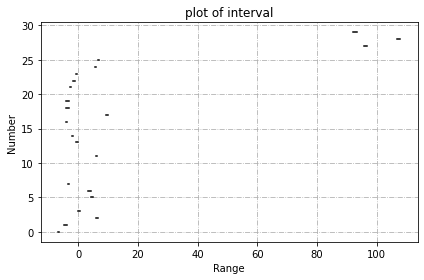

In [11]:
### plot of outlier
n = 30
n_outlier = 3
n_inlier = 27

central = np.random.normal(0, 4, n_inlier)
central_o1 = np.random.normal(-500, 4, n_outlier)
central_o2 = np.random.normal(100, 4, n_outlier)
central_o3 = np.random.binomial(1, 0.5, n_outlier)
central_o4 = np.random.normal(10, 4, n_outlier) + np.random.standard_t(1,n_outlier)

mydata = np.zeros((n, 2))
for j in range(n_inlier):
    interval_len = np.random.uniform(0, 1, 1)
    mydata[j, 0] = central[j] - interval_len / 2
    mydata[j, 1] = central[j] + interval_len / 2


# for s in range(n_outlier):
#     interval_len_o = np.random.uniform(0, 2, 1)
#     mydata[s+n_inlier, 0] = central_o4[s] - interval_len_o / 2
#     mydata[s+n_inlier, 1] = central_o4[s] + interval_len_o / 2
for s in range(n_outlier):
    interval_len_o = np.random.uniform(0, 2, 1)
    mydata[s+n_inlier, 0] = central_o2[s] - interval_len_o / 2
    mydata[s+n_inlier, 1] = central_o2[s] + interval_len_o / 2

show(mydata)